<a href="https://colab.research.google.com/github/arkaseth/Math-and-stat-for-ML/blob/main/DataNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Z-score

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
## create data

data = np.random.poisson(3, 1000) ** 2

In [4]:
# compute mean and std dev
datamean = np.mean(data)
datastd = np.std(data, ddof=1)

In [5]:
# data.mean()
# data.std(ddof=1)

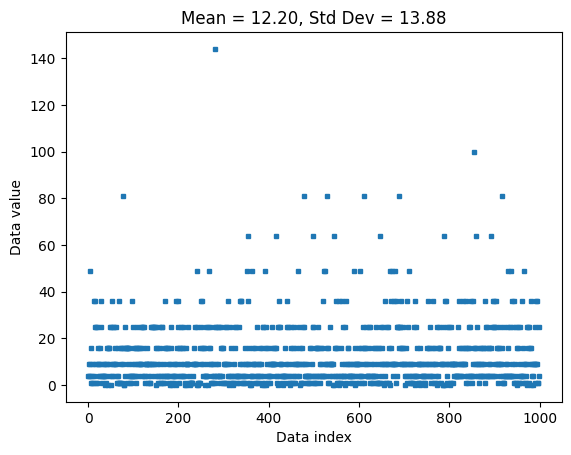

In [6]:
plt.plot(data, 's', markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f"Mean = {datamean:.2f}, Std Dev = {datastd:.2f}")
plt.show()

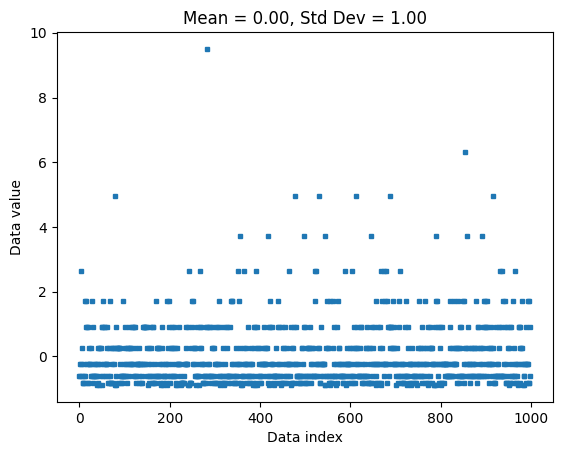

In [7]:
# Z-transform the data

zscore = (data - datamean) / datastd

dataz = stats.zscore(data)

dataZmean = np.mean(dataz)
dataZstd = np.std(dataz, ddof=1)

plt.plot(dataz, 's', markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f"Mean = {dataZmean:.2f}, Std Dev = {dataZstd:.2f}")

plt.show()

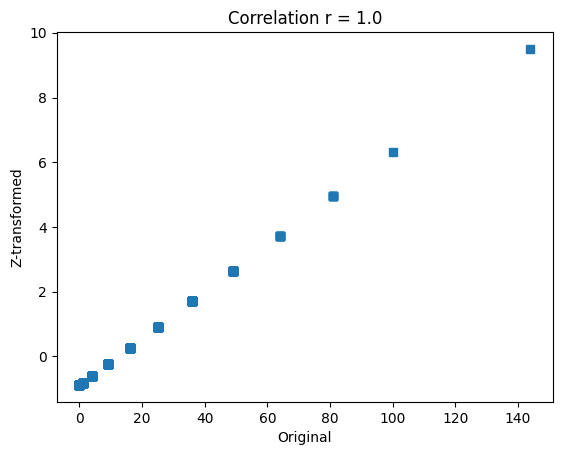

In [8]:
## relative values are preserved -> shape does not change

plt.plot(data, dataz, 's')
plt.xlabel('Original')
plt.ylabel('Z-transformed')
plt.title(f"Correlation r = {np.corrcoef(data,dataz)[0,0]}")
plt.show()

## Min-Max scaling

In [9]:
import matplotlib.pyplot as plt
import numpy as np

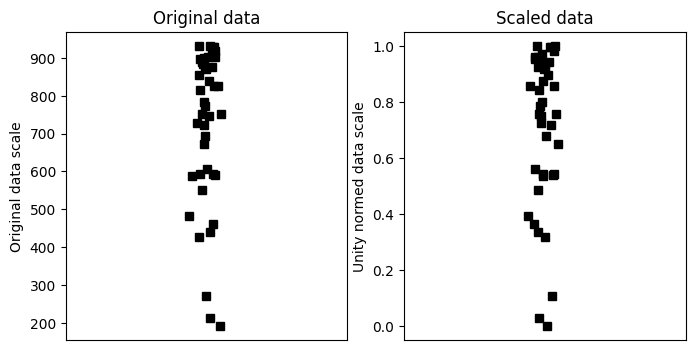

In [10]:
N = 42
data = np.log(np.random.rand(N)) * 234 + 934

dataMin = np.min(data)
dataMax = np.max(data)

dataS = (data-dataMin)/(dataMax-dataMin)

fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(1+np.random.randn(N)/20,data,'ks') # x-axis shift
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Original data scale')
ax[0].set_title('Original data')

ax[1].plot(1+np.random.randn(N)/20,dataS,'ks')
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity normed data scale')
ax[1].set_title('Scaled data')

plt.show()

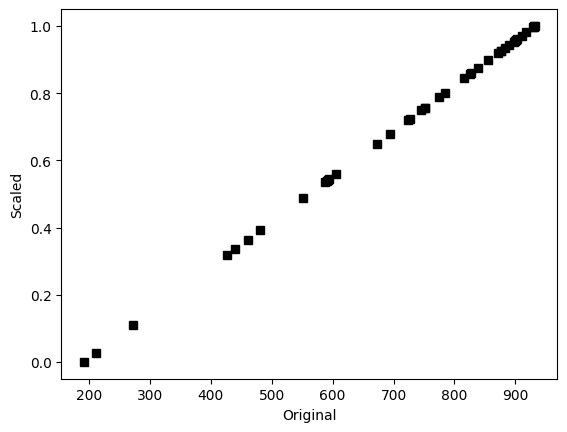

In [11]:
# scaling does not affect relative values

plt.plot(data, dataS, 'ks')
plt.ylabel('Scaled')
plt.xlabel('Original')

plt.show()

In [12]:
## scaling data to arbitrary range

# step 1: normalize to [0,1] as above

# step 2:
newMin = 4
newMax = 8.7

dataSS = dataS * (newMax-newMin) + newMin

print([min(dataSS), max(dataSS)])

[np.float64(4.0), np.float64(8.7)]


## Assignment: Invert min-max scaling

In [13]:
recoveredData = dataMin + ((dataMax-dataMin)*(dataSS-newMin)/(newMax-newMin))

print(np.stack([recoveredData[:5], data[:5]]))

[[875.66252973 694.42885065 838.04244699 876.63320355 211.71182502]
 [875.66252973 694.42885065 838.04244699 876.63320355 211.71182502]]


## Z-score for outlier removal

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels import robust

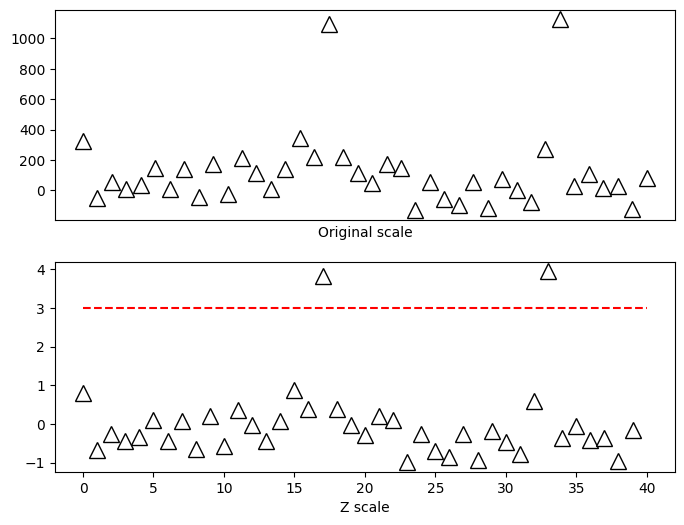

In [15]:
## create data

N = 40
data = np.random.randn(N)

# add outliers
data[data<-1] = data[data<-1] + 2
data[data>2] = data[data>2]**2

data = data*200+50 # change scale

dataZ = stats.zscore(data)

zscorethresh = 3

fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_xlabel('Original scale')

ax[1].plot(dataZ, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_xlabel('Z scale')

plt.show()

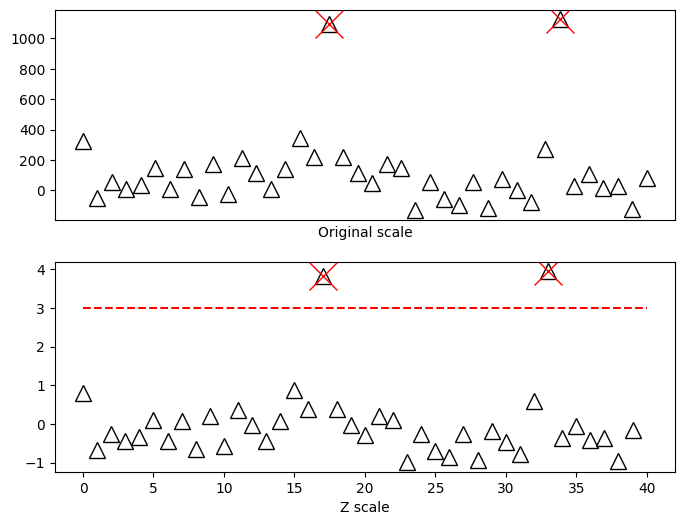

In [16]:
## identify outliers

outliers = np.where(np.abs(dataZ)>zscorethresh)[0]

# cross them out
ax[0].plot(outliers, data[outliers], 'x', color='r', markersize=20)
ax[1].plot(outliers, dataZ[outliers], 'x', color='r', markersize=20)

fig

In [17]:
## two options:

# 1. Replace data with NaN - preserves shape
# 2. Remove from dataset - changes shape

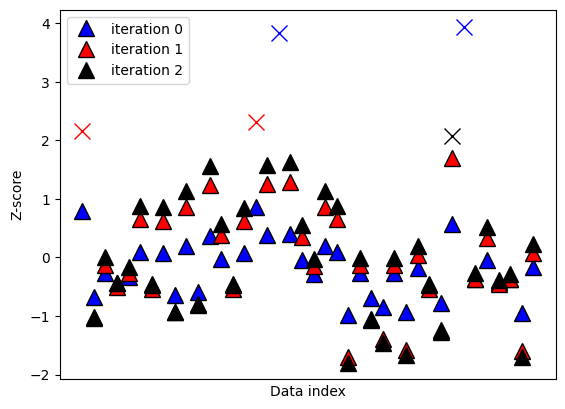

[ 0 15 17 32 33]


In [18]:
## iterative method

zscorethresh = 2 # too lenient in practice
dataZ = (data - np.mean(data)) / np.std(data)

colorz = 'brkm'
numiters = 0

while True:

  # convert to z
  datamean = np.nanmean(dataZ)
  datastd = np.nanstd(dataZ)
  dataZ = (dataZ - datamean) / datastd

  # find data values to remove
  toremove = dataZ > zscorethresh

  if sum(toremove) == 0:
    break

  plt.plot(np.where(toremove)[0], dataZ[toremove], '%sx'%colorz[numiters], markersize=12)
  dataZ[toremove] = np.nan

  plt.plot(dataZ, 'k^', markersize=12, markerfacecolor=colorz[numiters], label=f'iteration {numiters}')
  numiters = numiters + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()


removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

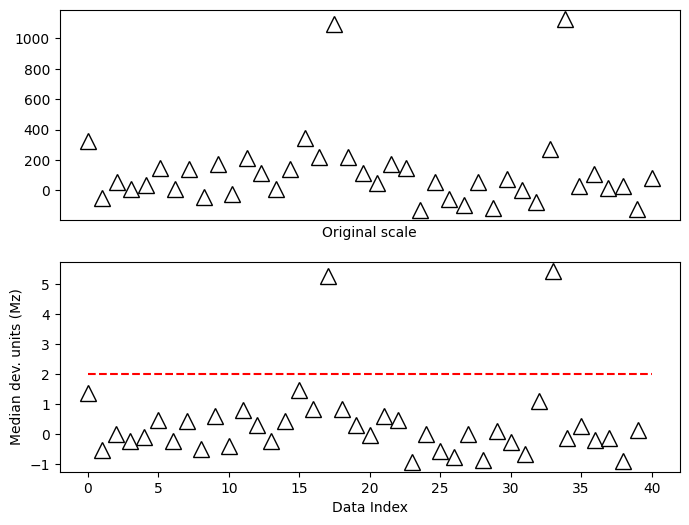

In [19]:
## modified Z for non-normal distributions

dataMed = np.median(data)
dataMad = robust.mad(data)

dataMz = 0.6745 * (data - dataMed) / dataMad
# dataMz = stats.norm.ppf(.75) * (data - dataMed) / dataMad

fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_xlabel('Original scale')

ax[1].plot(dataMz, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_ylabel('Median dev. units (Mz)')

plt.show()

## Data Trimming to remove outliers

In [20]:
import numpy as np
import matplotlib.pyplot as plt

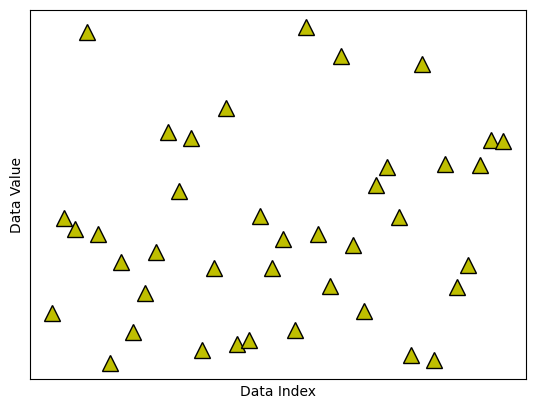

In [21]:
N = 40

data = np.random.randn(N, 1)
data[data<-2] = -data[data<-2]**2
data[data>2] = data[data>2]**2

dataMC = data - np.mean(data)

fig,ax = plt.subplots(1,1)
ax.plot(data, 'k^', label='All data', markerfacecolor='y', markersize=12)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Data Index')
ax.set_ylabel('Data Value')
plt.show()

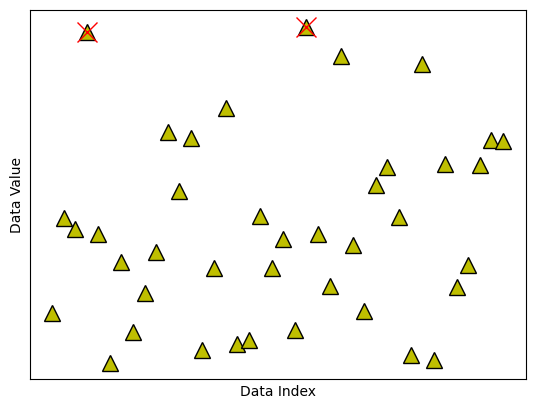

In [22]:
## option 1: remove k% data

trimPct = 5

datacutoff = np.percentile(np.abs(dataMC), 100-trimPct)

data2cut = np.where(np.abs(dataMC) > datacutoff)[0]

ax.plot(data2cut, data[data2cut], 'rx', label=f"{100-trimPct}% threshold", markersize=15)

fig

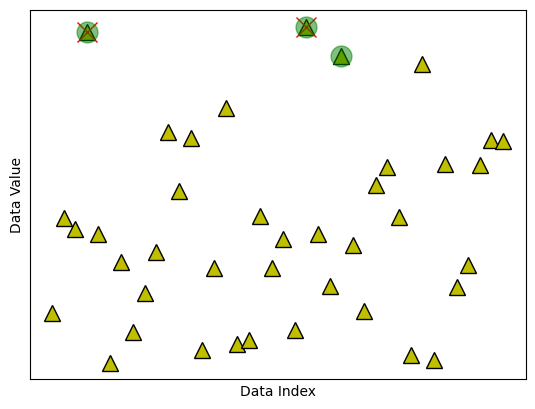

In [23]:
## option 2: remove k most extreme values

k2remove = 3

datasortIdx = np.argsort(np.abs(dataMC), axis=0)[::-1]
data2cut = np.squeeze(datasortIdx[:k2remove])

ax.plot(data2cut, data[data2cut], 'go', label=f"{k2remove}-value threshold", markersize=15, alpha=.5)

fig

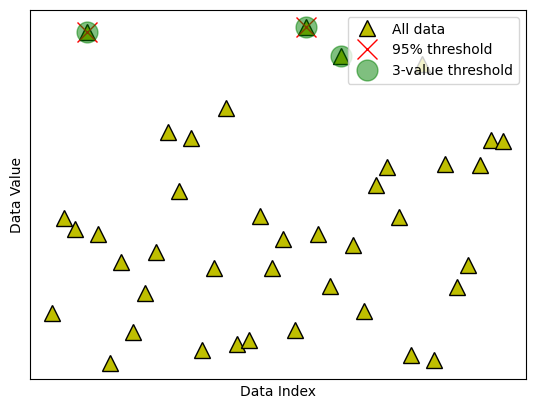

In [24]:
ax.legend()
fig

## Sampling Variability

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

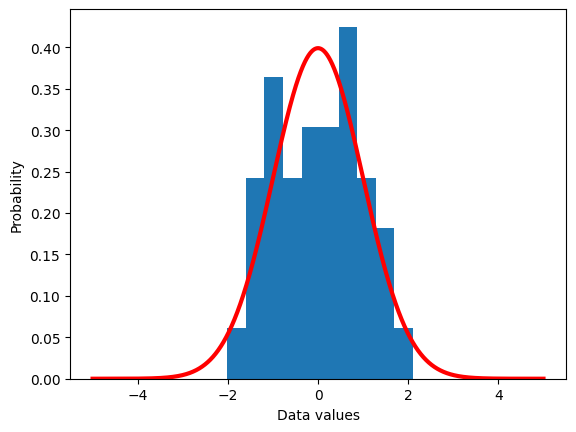

In [26]:
## theoretical normal
x = np.linspace(-5,5,10101)
theoNormDist = stats.norm.pdf(x)
# normalize to pdf:
# theoNormDist = theoNormDist*np.mean(np.diff(x))

numSamples = 40

sampleData = np.zeros(numSamples)

for expi in range(numSamples):
  sampleData[expi] = np.random.randn()

# sampleData = np.random.randn(numSamples)

plt.hist(sampleData, density=True)
plt.plot(x, theoNormDist, 'r', linewidth=3)
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.show()

In [27]:
## NOTE: If needed, normalize values of all the distributions to 1,
## so that all data is on the same scale

In [28]:
## show the mean

populationN = 1000000
population = np.random.randn(populationN)
population = population - np.mean(population)

sampleSize = 30

sampleidx = np.random.randint(0, populationN, sampleSize)
samplemean = np.mean(population[sampleidx])

print(samplemean)

0.06260852715890014


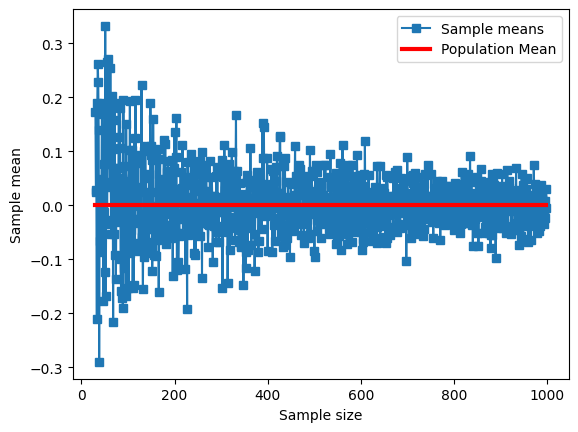

In [29]:
sampleSizes = np.arange(30,1000)

sampleMeans = np.zeros(len(sampleSizes))

for sampi in range(len(sampleSizes)):
  sampleIdx = np.random.randint(0, populationN, sampleSizes[sampi])
  sampleMeans[sampi] = np.mean(population[sampleIdx])

plt.plot(sampleSizes, sampleMeans, 's-')
plt.plot(sampleSizes[[0,-1]], [np.mean(population), np.mean(population)], 'r', linewidth=3)
plt.xlabel('Sample size')
plt.ylabel('Sample mean')
plt.legend(('Sample means', 'Population Mean'))
plt.show()

In [30]:
np.mean(sampleMeans[:500])

np.float64(0.006781673819429575)

## Conditional Probabilities

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
## generate long-spike time series

N = 10000
spikeDur = 10
spikeNumA = 0.01
spikeNumB = 0.05

spike_tsA = np.zeros(N)
spike_tsB = np.zeros(N)

spiketimesA = np.random.randint(0, N, int(N*spikeNumA))

for spikei in range(len(spiketimesA)):

  bnd_pre = int(max(0,spiketimesA[spikei]-spikeDur/2))
  bnd_pst = int(min(N,spiketimesA[spikei]+spikeDur/2))

  spike_tsA[bnd_pre:bnd_pst] = 1

spiketimesB = np.random.randint(0, N, int(N*spikeNumB))
spiketimesB[:len(spiketimesA)] = spiketimesA # introduce strong conditional probability

for spikei in range(len(spiketimesB)):

  bnd_pre = int(max(0,spiketimesB[spikei]-spikeDur/2))
  bnd_pst = int(min(N,spiketimesB[spikei]+spikeDur/2))

  spike_tsB[bnd_pre:bnd_pst] = 1

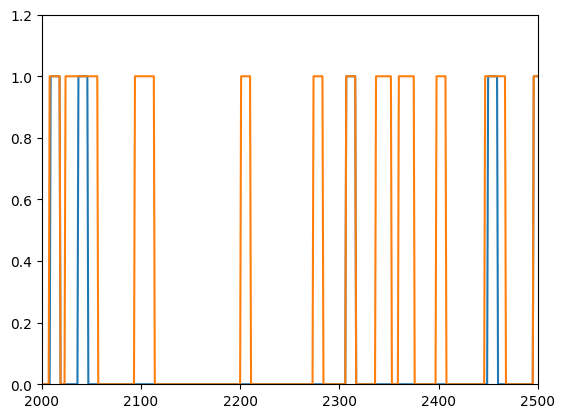

In [33]:
plt.plot(range(N), spike_tsA, range(N), spike_tsB)
plt.ylim([0,1.2])
plt.xlim([2000,2500])
plt.show()

In [34]:
## compute probabilities and intersection

probA = np.sum(spike_tsA==1)/N
probB = np.mean(spike_tsB==1)

# joint probability
probAB = np.mean(spike_tsA+spike_tsB==2)

print(probA, probB, probAB)

0.0928 0.3891 0.0928


In [35]:
## compute conditional probabilities

# p(A|B)
pAGivenB = probAB/probB

# p(B|A)
pBGivenA = probAB/probA

print(f"P(A) = {probA:.4f}")
print(f"P(A|B) = {pAGivenB:.4f}")
print(f"P(B) = {probB:.4f}")
print(f"P(B|A) = {pBGivenA:.4f}")

P(A) = 0.0928
P(A|B) = 0.2385
P(B) = 0.3891
P(B|A) = 1.0000


In [36]:
# If P(X) ~= P(X|Y), X and Y have almost
# 0 correlation. Y has almost no influence on X

In [37]:
# Since we introduced strong influence of
# A on B, P(B|A) = 1

# Since P(A|B) > P(A), B has some representation
# or influence on A

## Law of large numbers

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
## biased die probabilities
f1 = 2/8
f2 = 2/8
f3 = 1/8
f4 = 1/8
f5 = 1/8
f6 = 1/8

print(f1+f2+f3+f4+f5+f6)

1.0


In [40]:
expVal = 1*f1 + 2*f2+3*f3+4*f4+5*f5+6*f6
print(expVal)

3.0


In [41]:
# generate "population"
population = [1, 1, 2, 2, 3, 4, 5, 6]
for i in range(20):
  population = np.hstack((population, population))

nPop = len(population)
print(nPop)

8388608


In [42]:
# draw sample of 8 rolls
sample = np.random.choice(population, 8)
print(np.mean(sample))

3.5


In [43]:
## draw larger and larger samples

k = 5000
sampleAve = np.zeros(k)

for i in range(k):
  sample = np.random.choice(population, i+1)
  sampleAve[i] = np.mean(sample)
  # idx = np.floor(np.random.rand(i+1)*nPop)
  # sampleAve[i] = np.mean(population[idx.astype(int)])

print(np.mean(sampleAve))
print(np.mean(sampleAve[:9]))

2.9990015305625786
2.716005291005291


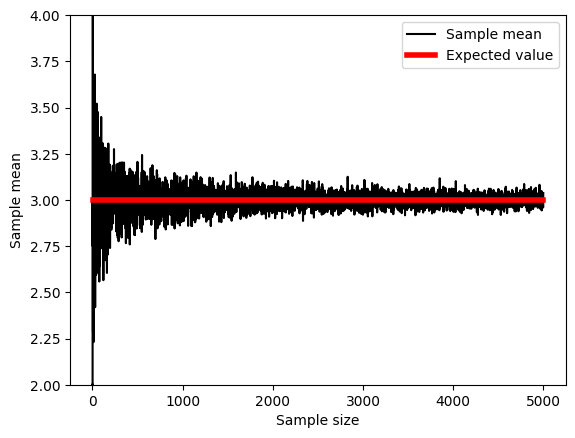

In [44]:
plt.plot(sampleAve, 'k')
plt.plot([1, k], [expVal, expVal], 'r', linewidth=4)
plt.xlabel('Sample size')
plt.ylabel('Sample mean')
plt.ylim([expVal-1, expVal+1])
plt.legend(('Sample mean', 'Expected value'))
plt.show()

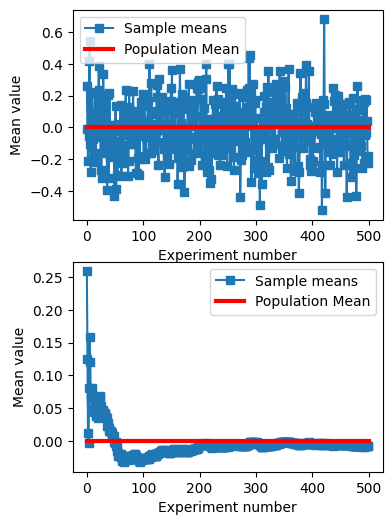

In [45]:
## example from prev section

populationN = 1000000
population = np.random.randn(populationN)
population = population - np.mean(population)

sampleSize = 30
numberOfExps = 500
sampleMeans = np.zeros(numberOfExps)

for expi in range(numberOfExps):
  sampleIdx = np.random.randint(0, populationN, sampleSize)
  sampleMeans[expi] = np.mean(population[sampleIdx])

fig,ax = plt.subplots(2,1,figsize=(4,6))

ax[0].plot(sampleMeans, 's-')
ax[0].plot([0,numberOfExps], [np.mean(population), np.mean(population)], 'r', linewidth=3)
ax[0].set_xlabel('Experiment number')
ax[0].set_ylabel('Mean value')
ax[0].legend(('Sample means', 'Population Mean'))

ax[1].plot(np.cumsum(sampleMeans)/np.arange(1,numberOfExps+1),'s-')
ax[1].plot([0,numberOfExps], [np.mean(population), np.mean(population)], 'r', linewidth=3)
ax[1].set_xlabel('Experiment number')
ax[1].set_ylabel('Mean value')
ax[1].legend(('Sample means', 'Population Mean'))

plt.show()

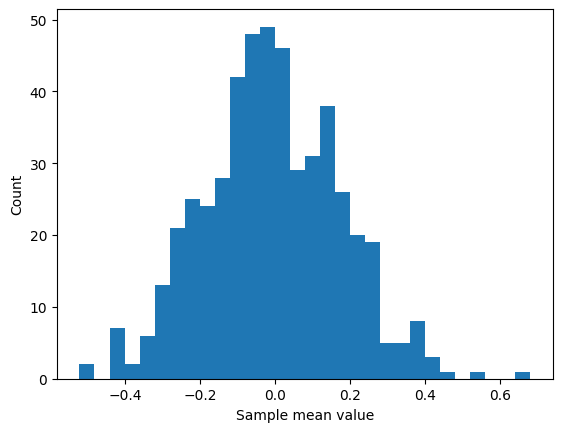

In [46]:
plt.hist(sampleMeans,30)
plt.xlabel('Sample mean value')
plt.ylabel('Count')
plt.show() # Distibution of frequency of sample means around population mean is Gaussian!